# Impact du Nombre de Couches Cachees sur les Reseaux de Neurones
## Comparaison entre reseaux peu profonds et reseaux profonds

ABBASI Tahreem <br>
3 Decembre 2024

# Sommaire

- [Introduction](#Introduction)
  - [Contexte](#1-Contexte)
  - [Objectifs du TP](#2-Objectifs-du-TP)
  - [Structure du TP](#3-Structure-du-TP)
- [1. Préparation des données](#31-Préparation-des-données)
- [2. Construction des modèles](#32-Construction-des-modèles)
- [3. Entraînement et évaluation](#33-Entraînement-et-évaluation)
- [4. Analyse et discussion des résultats](#34-Analyse-et-discussion-des-résultats)

---

# Introduction

## 1. Contexte

Comme vous le savez : un réseau de neurones est une modélisation inspirée de la structure d’un neurone de cerveau humain.

Les couches cachées situées entre l’entrée et la sortie du réseau détectent des caractéristiques spécifiques des données, en capturant des relations non linéaires et des interdépendances complexes entre les variables. Ainsi, plus un réseau possède de couches cachées, plus il est capable d’extraire des informations riches et complexes, mais au prix d’un coût computationnel plus élevé.

Ainsi, le nombre de couches doit être choisi en équilibrant la complexité des informations et les contraintes en termes de temps et de ressources de calcul. Nous avons le choix entre deux types de réseaux :

- **Les réseaux peu profonds** (par exemple, deux ou trois couches cachées) : rapides à entraîner et efficaces sur des tâches simples. Mais ils sont limités lorsque les relations entre les données sont complexes.
- **Les réseaux profonds** : avec cinq couches ou plus. Peuvent capturer des relations plus riches et variées. Mais nécessitent un entraînement plus long, plus de ressources et plus de données (risque de surapprentissage si données insuffisantes).

---

## 2. Objectifs 

Dans ce TP, nous allons donc évaluer ces compromis, en construisant et comparant un réseau peu profond et un réseau profond.

1. **Mesurer l’impact de la profondeur d’un réseau** sur ses performances, en utilisant des métriques que vous connaissez déjà : précision, rappel, et courbe ROC.
2. **Analyser les implications en termes de coût computationnel**, notamment les temps d’entraînement et de calcul.

En somme, ce TP doit vous permettre d’articuler théorie et pratique : comprendre pourquoi et dans quelles conditions il est pertinent d’utiliser un réseau profond plutôt qu’un réseau peu profond.

---

## 3. Structure 

Pour répondre aux objectifs, ce TP s’appuie sur des données réelles issues d’une étude sur la capacité de 91 composés médicamenteux à franchir la membrane placentaire. La variable cible est la clairance (CI2), donnée sous forme qualitative à deux classes :

- **0** : le composé ne passe pas la membrane placentaire.
- **1** : le composé passe la membrane placentaire.

Les descripteurs physico-chimiques de ces composés servent de variables explicatives pour construire nos modèles.

Le TP se décompose en quatre étapes :

- **Préparation des données** : Prétraitement des données (suppression des variables constantes, traitement des valeurs manquantes, normalisation, découpage des données).
- **Construction des modèles** : Conception de deux réseaux de neurones (peu profond et profond).
- **Entraînement et évaluation** : Comparaison des performances (précision, rappel, courbe ROC) et analyse du temps d’entraînement.
- **Analyse et discussion des résultats** : Interprétation des forces et des limites des approches.

---


## Instructions pour l'exécution :
-  Installez les bibliothèques nécessaires : pip install pandas scikit-learn tensorflow.
- Assurez-vous que le fichier membrane.placentaire.tsv est dans le bon répertoire.
- Copiez et exécutez ce script dans un IDE comme PyCharm, VS Code, ou Jupyter Notebook.

# Etape 1 : Préparation des données 

## 1.1 Importation des bibliothèques nécessaires

### 1.1.1 Installation des bibliothèques 

In [42]:
pip install pandas numpy scikit-learn tensorflow matplotlib 

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### 1.1.2 Import des bibliothèques 

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.optimizers import Adam
from keras.regularizers import l2

## 1.2 Chargement des données

In [44]:
file_path = "membrane.placentaire.tsv"  
data = pd.read_csv(file_path, sep="\t")

### 1.2.1 Affichage des premières lignes pour comprendre les données
Cette étape permet de comprendre la structure de votre fichier.

In [45]:
print("Aperçu des données :")
print(data.head())

Aperçu des données :
            CI2      MW   AMW     Sv     Se     Sp     Ss    Mv    Me    Mp  \
Abacavir      0  286.38  7.34  24.06  39.24  25.06  46.17  0.62  1.01  0.64   
Acipimox      0  153.13  9.57  10.42  17.01  10.52  37.00  0.65  1.06  0.66   
Acyclovir     0  225.24  8.34  16.30  28.14  16.68  44.17  0.60  1.04  0.62   
Alanine_L     0   89.11  6.85   6.81  13.41   7.20  22.00  0.52  1.03  0.55   
Alfentanil    1  417.60  6.63  36.57  63.02  38.68  66.92  0.58  1.00  0.61   

            ...  Hypnotic.50  Neoplastic.80  Neoplastic.50  Infective.80  \
Abacavir    ...            0              1              0             1   
Acipimox    ...            0              0              0             0   
Acyclovir   ...            0              0              0             0   
Alanine_L   ...            0              0              0             0   
Alfentanil  ...            0              1              0             1   

            Infective.50  BLTF96  BLTD48  BLTA9

Le jeu de données (membrane.placentaire.tsv) :
- Contiennent 91 échantillons (composés) avec 799 caractéristiques.
- De nombreux champs sont numériques, ce qui est idéal pour un réseau de neurones, mais il faudra vérifier leur échelle pour garantir une convergence optimale.

### Visualisation distribution données 

Distribution des classes (CI2) :
CI2
0    54
1    37
Name: count, dtype: int64

Proportions des classes (CI2) :
CI2
0    0.593407
1    0.406593
Name: proportion, dtype: float64


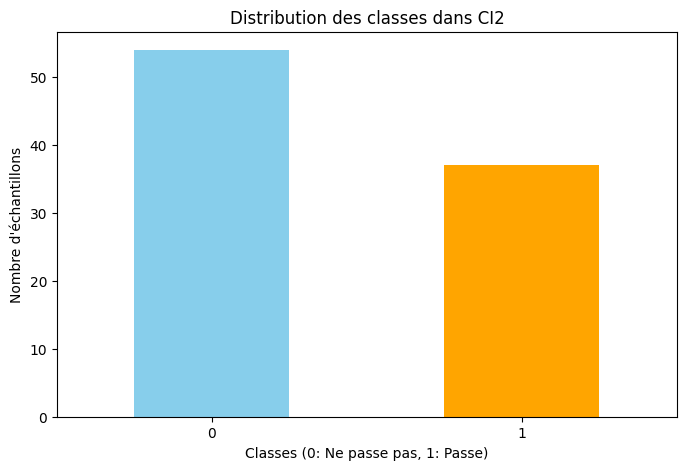

In [46]:
# Compter les occurrences pour chaque classe
ci2_distribution = data['CI2'].value_counts()
# Calculer les proportions de chaque classe
ci2_proportions = data['CI2'].value_counts(normalize=True)

# Afficher les résultats
print("Distribution des classes (CI2) :")
print(ci2_distribution)
print("\nProportions des classes (CI2) :")
print(ci2_proportions)

# Visualisation de la distribution
plt.figure(figsize=(8, 5))
ci2_distribution.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Distribution des classes dans CI2')
plt.xlabel('Classes (0: Ne passe pas, 1: Passe)')
plt.ylabel('Nombre d\'échantillons')
plt.xticks(rotation=0)
plt.show()

## 1.3 : Préparation des données

### 1.3.1 Calculer le nombre de valeurs NA

In [47]:
# Calculer le nombre de NA par colonne
na_per_column = data.isnull().sum()

# Total de NA dans l'ensemble des données
total_na = na_per_column.sum()

print("Nombre de NA par colonne :")
print(na_per_column[na_per_column > 0])  # Colonnes avec au moins un NA
print(f"\nTotal de valeurs NA dans l'ensemble des données : {total_na}")

Nombre de NA par colonne :
Series([], dtype: int64)

Total de valeurs NA dans l'ensemble des données : 0


### 1.3.2 Calculer le nombre de 0

In [48]:
# Calculer le nombre de zéros pour toutes les colonnes sauf CI2
zeros_per_column = (data.loc[:, data.columns != 'CI2'] == 0).sum()

# Total de zéros dans l'ensemble des colonnes restantes
total_zeros = zeros_per_column.sum()

# Afficher les résultats
print("\nNombre de zéros par colonne (excluant CI2) :")
print(zeros_per_column[zeros_per_column > 0])  # Colonnes avec au moins un zéro
print(f"\nTotal de valeurs égales à 0 dans l'ensemble des données (excluant CI2) : {total_zeros}")


Nombre de zéros par colonne (excluant CI2) :
nBM               2
ARR              32
nCIC              7
nCIR              7
RBN               6
                 ..
Hypnotic.50      86
Neoplastic.80    43
Neoplastic.50    75
Infective.80     51
Infective.50     82
Length: 589, dtype: int64

Total de valeurs égales à 0 dans l'ensemble des données (excluant CI2) : 33694


Il y a 33694 valeurs égales à 0 qu'on va devoir éliminer en supprimant les colonnes qui contiennent uniquement des zéros ou celles où le nombre de zéros dépasse un seuil raisonnable (par exemple, 30), afin de ne conserver que les colonnes informatives pour l'analyse ou l'entraînement des modèles.

### 1.3.3 Calculer le nombre de 0

In [49]:
# Identifier les colonnes binaires (toutes les valeurs sont soit 0 soit 1)
binary_columns = [col for col in data.columns if set(data[col].dropna().unique()).issubset({0, 1})]

print(f"Le nombres de variables binaire dans le jeu de données: {len(binary_columns)}")
# Compter le nombre de zéros dans chaque colonne
zero_counts = data.isin([0]).sum()
print(f"\nTotal de valeurs égales à 0 dans l'ensemble des données (excluant CI2) : {zero_counts}")

# Identifier les colonnes à supprimer : plus de 40 zéros et non binaires
columns_to_drop = [col for col in data.columns if zero_counts[col] > 40 and col not in binary_columns]


#data = data.drop(columns=columns_to_drop)

# Afficher les informations sur les colonnes supprimées et celles restantes
print(f"Colonnes supprimées (hors CI2) : {len(columns_to_drop)}")
print(f"Colonnes restantes après nettoyage : {data.shape[1]}")

# Vérifier les données nettoyées
print(data.head())

Le nombres de variables binaire dans le jeu de données: 242

Total de valeurs égales à 0 dans l'ensemble des données (excluant CI2) : CI2            54
MW              0
AMW             0
Sv              0
Se              0
               ..
BLTF96          0
BLTD48          0
BLTA96          0
ALOGPS_logP     0
ALOGPS_logS     0
Length: 799, dtype: int64
Colonnes supprimées (hors CI2) : 135
Colonnes restantes après nettoyage : 799
            CI2      MW   AMW     Sv     Se     Sp     Ss    Mv    Me    Mp  \
Abacavir      0  286.38  7.34  24.06  39.24  25.06  46.17  0.62  1.01  0.64   
Acipimox      0  153.13  9.57  10.42  17.01  10.52  37.00  0.65  1.06  0.66   
Acyclovir     0  225.24  8.34  16.30  28.14  16.68  44.17  0.60  1.04  0.62   
Alanine_L     0   89.11  6.85   6.81  13.41   7.20  22.00  0.52  1.03  0.55   
Alfentanil    1  417.60  6.63  36.57  63.02  38.68  66.92  0.58  1.00  0.61   

            ...  Hypnotic.50  Neoplastic.80  Neoplastic.50  Infective.80  \
Abacavir    .

### 1.3.4 Élimination des colonnes constantes
Les colonnes avec des valeurs identiques pour tous les échantillons ne contiennent aucune information utile.

In [50]:
constant_columns = data.columns[(data == data.iloc[0]).all()]
data_cleaned = data.drop(columns=constant_columns)

# Afficher les résultats
print(f"Nombre de colonnes supprimées : {len(constant_columns)}")
print(f"Nombre de colonnes restantes après suppression : {data_cleaned.shape[1]}")

Nombre de colonnes supprimées : 177
Nombre de colonnes restantes après suppression : 622


**Remarque** : le data sur lequel on travaillera s'appelle **data_cleaned**

### 1.3.5 Séparation des descripteurs (X) et de la variable cible (y)
    
- X contient les descripteurs, utilisés comme entrées pour le réseau de neurones.
- y contient la cible, que le modèle essaiera de prédire.

Cette séparation est essentielle car le réseau de neurones doit savoir quelles données utiliser pour l'entraînement (X) et quelle variable utiliser comme référence pour ajuster ses prédictions (y).
Cela permet d'entraîner le modèle pour trouver une relation entre les descripteurs et la cible.

In [51]:
X = data_cleaned.drop(columns=["CI2"]) # Toutes les colonnes sauf la cible
y = data_cleaned["CI2"] # Colonne cible (0 ou 1)

print("Dimensions de X :", X.shape)
print("Dimensions de y :", y.shape)

Dimensions de X : (91, 621)
Dimensions de y : (91,)


### 1.3.6 Normalisation des descripteurs
Les réseaux de neurones fonctionnent mieux lorsque toutes les variables d'entrée sont sur une échelle similaire.

In [52]:
# Cela permet d'avoir toutes les valeurs dans une plage similaire (utile pour les réseaux de neurones)
scaler = StandardScaler()
X = scaler.fit_transform(X)

### 1.3.7 Division en ensembles d'entraînement et de test
On sépare les données pour pouvoir évaluer les performances du modèle sur des données qu'il n'a jamais vues.
- 70 % des données pour l'entraînement
- 30 % pour le test

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)
print("Dimensions de l'ensemble d'entraînement :", X_train.shape)
print("Dimensions de l'ensemble de test :", X_test.shape)

Dimensions de l'ensemble d'entraînement : (63, 621)
Dimensions de l'ensemble de test : (28, 621)


## Étape 2 : Construction des modèles

### 2.1 Fonction pour construire un modèle

In [54]:
def build_model(input_dim, hidden_layers, neurons_per_layer, activation="relu", output_activation="sigmoid"):
    """
    Construire un modèle de réseau de neurones pour une classification binaire.
    input_dim : Nombre de descripteurs en entrée
    hidden_layers : Nombre de couches cachées
    neurons_per_layer : Nombre de neurones par couche
    activation : Fonction d'activation des couches cachées
    output_activation : Fonction d'activation pour la sortie
    """
    model = Sequential()
    
    # Première couche d'entrée
    model.add(Input(shape=(input_dim,)))
    
    # Ajout des couches cachées avec régularisation et dropout
    for _ in range(hidden_layers):
        model.add(Dense(neurons_per_layer, activation=activation, kernel_regularizer=l2(0.01)))
        model.add(Dropout(0.6))  # Régularisation Dropout
        
    # Couche de sortie
    model.add(Dense(1, activation=output_activation))
    # Compilation du modèle avec un optimiseur Adam personnalisé
    optimizer = Adam(learning_rate=0.0005)
    model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy", "AUC"])
    return model

### 2.2 Modèle peu profond : 2 couches cachées
Modèle peu profond :
- Contient seulement 2 couches cachées avec 32 neurones chacune.
- Convient pour des tâches simples ou lorsque les relations dans les données sont peu complexes.

In [55]:
print("\nConstruction du modèle peu profond...")
shallow_model = build_model(input_dim=X_train.shape[1], hidden_layers = 2, neurons_per_layer = 16)

# Résumé du modèle
print("\nRésumé du modèle peu profond :")
shallow_model.summary()


Construction du modèle peu profond...

Résumé du modèle peu profond :


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 16)             │         9,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,241 (40.00 KB)

 Trainable params: 10,241 (40.00 KB)

 Non-trainable params: 0 (0.00 B)

### 2.3 Modèle profond : 5 couches cachées
Modèle profond :
- Contient 5 couches cachées avec 32 neurones chacune.
- Capable de capturer des relations complexes, mais plus coûteux à entraîner.

In [56]:
print("\nConstruction du modèle profond...")
deep_model = build_model(input_dim=X_train.shape[1], hidden_layers = 3, neurons_per_layer = 32)

print("\nRésumé du modèle profond :")
deep_model.summary()



Construction du modèle profond...

Résumé du modèle profond :


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 32)             │        19,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,049 (86.13 KB)

 Trainable params: 22,049 (86.13 KB)

 Non-trainable params: 0 (0.00 B)

# Etape 3 : Evaluation des modèles 

Dans cette étape, nous allons construire les modèles et les entrainer, les performances seront évaluées par la suite.

### 3.1 : Fixer les paramètres 

Tout d’abord on fixe les paramètres : 
- Les **epochs** qui correspondent au nombre total de passages complets sur le jeu de données d'entraînement que le modèle effectue pendant son entraînement. 
En augmentant le nombre d'époques, le modèle peut mieux apprendre, mais cela augmente aussi le risque de sur-apprentissage (overfitting).

- Le **batch-size** détermine combien d'échantillons de données sont traités à la fois avant que le modèle ne mette à jour ses poids, donc on divise les données en mini-lots. 
Une petite taille de lot utilise moins de mémoire mais peut être plus bruitée (des gradients moins stables), tandis qu'une grande taille de lot peut nécessiter plus de mémoire et être plus lente.

In [57]:
epochs = 50
batch_size = 32

- Cela signifie que le modèle passera 50 fois sur l'ensemble des données d'entraînement pour ajuster ses poids et les 91 échantillons sont divisés en mini-lots de taille 32 lors de l'entraînement.

### 3.2 : Fonction pour entrainer les modèles et mesurer le temps

In [58]:
import time
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score

# Fonction pour entraîner le modèle et évaluer les performances
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, epochs, batch_size):
    """
    Entraîne un modèle de réseau de neurones et évalue ses performances.
    
    Paramètres :
    - model : Le modèle à entraîner.
    - X_train, y_train : Données d'entraînement.
    - X_test, y_test : Données de test.
    - epochs : Nombre d'époques pour l'entraînement.
    - batch_size : Taille du lot (batch).
    
    Retourne :
    - metrics : Dictionnaire contenant la précision et le le temps d'entraînement.
    """
    # Mesurer le temps d'entraînement
    start_time = time.time()
    
    # Entraînement du modèle
    history = model.fit(
        X_train, y_train,
        epochs = epochs,
        batch_size=batch_size,
        verbose = 1,
        validation_data = (X_test, y_test)
    )
    training_time = time.time() - start_time  # Calculer le temps total d'entraînement
    
    # Prédictions sur l'ensemble de test
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    
    # Calcul des métriques
    metrics = {
        "accuracy": accuracy_score(y_test, y_pred),
        "training_time": training_time,
    }
    
    return metrics, history

Cette fonction entraîne notre réseau de neurones et évalue ses performances. Elle :
- Mesure le temps d'entraînement.
- Utilise fit pour entraîner le modèle sur les données d'entraînement avec validation sur les données de test.
- Prédit les classes sur les données de test.
- Calcule des métriques clés comme la précision (accuracy).
- Retourne un dictionnaire contenant la précision et le temps d'entraînement, ainsi que l'historique (history) pour analyser les performances au fil des époques.

### 3.3 : Entrainement des modèles 

#### Modèle peu profond 

In [59]:
print("\nEntraînement du modèle peu profond...")
shallow_metrics, shallow_history = train_and_evaluate_model(shallow_model, X_train, y_train, X_test, y_test, epochs, batch_size)

print("\nPerformances du modèle peu profond :")
print(shallow_metrics)


Entraînement du modèle peu profond...
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step - AUC: 0.4850 - accuracy: 0.4423 - loss: 1.6272 - val_AUC: 0.8102 - val_accuracy: 0.6786 - val_loss: 1.0230
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - AUC: 0.5397 - accuracy: 0.6314 - loss: 1.7441 - val_AUC: 0.8021 - val_accuracy: 0.6786 - val_loss: 1.0160
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - AUC: 0.5221 - accuracy: 0.5055 - loss: 1.4638 - val_AUC: 0.8021 - val_accuracy: 0.6429 - val_loss: 1.0114
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - AUC: 0.5007 - accuracy: 0.4947 - loss: 1.5232 - val_AUC: 0.7968 - val_accuracy: 0.6786 - val_loss: 1.0093
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 0.5454 - accuracy: 0.5053 - loss: 1.3009 - val_AUC: 0.7914 - val_accuracy: 0.7143 - val_loss: 1.0122
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - AUC: 0.5848 - accuracy: 0.5579 - loss: 1.2584 - val_AUC: 0.7914 - val_accuracy: 0.7143 - val_loss: 1.0125
Epoch 7/50
2/2 ━━━

#### Modèle profond

In [60]:
print("\nEntraînement du modèle profond...")
deep_metrics, deep_history = train_and_evaluate_model(deep_model, X_train, y_train, X_test, y_test, epochs, batch_size)

print("\nPerformances du modèle profond :")
print(deep_metrics)


Entraînement du modèle profond...
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - AUC: 0.3042 - accuracy: 0.3686 - loss: 3.1440 - val_AUC: 0.4492 - val_accuracy: 0.5357 - val_loss: 2.0650
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - AUC: 0.5349 - accuracy: 0.5051 - loss: 2.3583 - val_AUC: 0.4706 - val_accuracy: 0.5357 - val_loss: 2.0392
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - AUC: 0.4899 - accuracy: 0.4633 - loss: 2.3362 - val_AUC: 0.4733 - val_accuracy: 0.5000 - val_loss: 2.0212
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - AUC: 0.3533 - accuracy: 0.3790 - loss: 2.4628 - val_AUC: 0.4572 - val_accuracy: 0.5000 - val_loss: 2.0059
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - AUC: 0.5572 - accuracy: 0.5159 - loss: 2.4965 - val_AUC: 0.4599 - val_accuracy: 0.5000 - val_loss: 1.9949
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - AUC: 0.4085 - accuracy: 0.4001 - loss: 2.4262 - val_AUC: 0.4599 - val_accuracy: 0.5000 - val_loss: 1.9801
Epoch 7/50
2/2 ━━━━━━━

### 3.4 : Visualisation de la perte et la précision

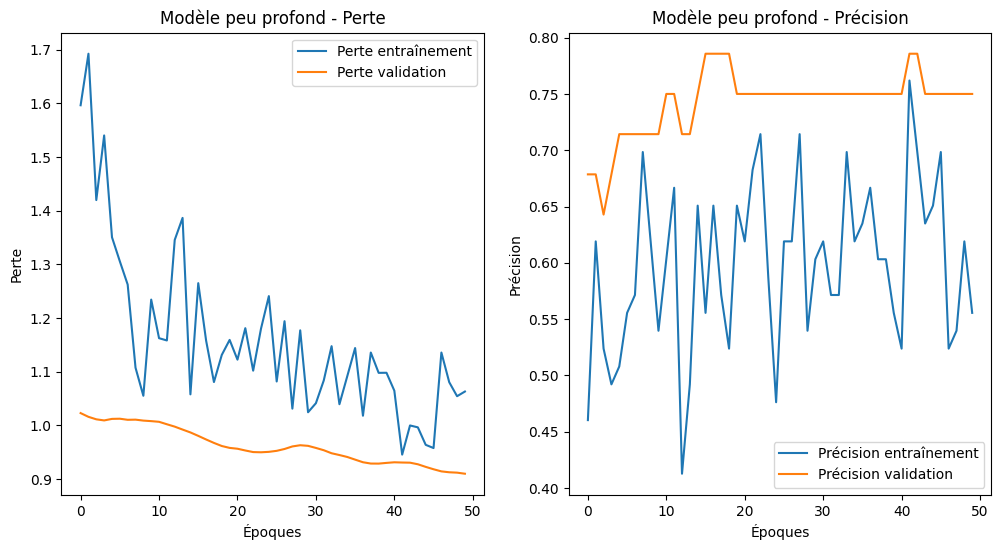

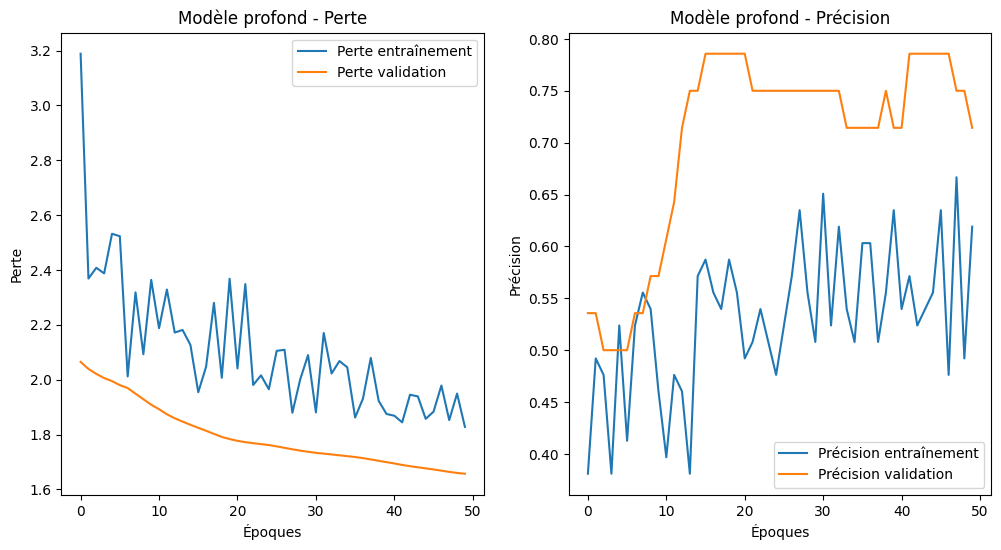

In [61]:
import matplotlib.pyplot as plt

# Fonction pour tracer les courbes
def plot_training_curves(history, title = "Courbes d'entraînement"):
    plt.figure(figsize=(12, 6))
    # Courbe de perte
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Perte entraînement')
    plt.plot(history.history['val_loss'], label='Perte validation')
    plt.title(f"{title} - Perte")
    plt.xlabel("Époques")
    plt.ylabel("Perte")
    plt.legend()
    
    # Courbe de précision
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Précision entraînement')
    plt.plot(history.history['val_accuracy'], label='Précision validation')
    plt.title(f"{title} - Précision")
    plt.xlabel("Époques")
    plt.ylabel("Précision")
    plt.legend()
    plt.show()

# Tracer les courbes pour le modèle peu profond
plot_training_curves(shallow_history, title="Modèle peu profond")
# Tracer les courbes pour le modèle profond
plot_training_curves(deep_history, title="Modèle profond")

**Analyse** : <br>
Les graphiques présentés illustrent l'évolution de la perte et de la précision pour les modèles peu profond et profond au cours des 50 époques d'entraînement. Ces deux métriques sont observées à la fois sur l'ensemble d'entraînement et sur l'ensemble de validation, ce qui permet d'évaluer à la fois la capacité d'apprentissage et la généralisation des modèles.


- **Modèle peu profond** :
    - *Courbe de perte* :
La perte d'entraînement diminue progressivement et la perte de validation est stable et basse.
Cela montre que le modèle s'adapte bien aux données sans surapprentissage.
    - *Courbe de précision* :
La précision de validation est relativement stable, atteignant environ 75 % après quelques époques, ce qui est un bon résultat.
La précision d'entraînement fluctue en raison de la petite taille des données, mais reste raisonnable.

Conclusion : Le modèle peu profond est bien adapté au petit ensemble de données et généralise correctement.

- **Modèle profond** :
    - *Courbe de perte* : 
La perte d'entraînement diminue régulièrement, mais la perte de validation reste significativement plus haute, ce qui indique un début de surapprentissage.
Le modèle est trop complexe pour la taille des données.
    - *Courbe de précision* : 
La précision d'entraînement fluctue davantage, et bien qu'elle atteigne des pics, la précision de validation est instable.
Cela montre que le modèle ne parvient pas à mieux généraliser malgré sa complexité.

**Conclusion** : <br>
Le modèle peu profond montre une meilleure stabilité et généralisation avec des performances comparables au modèle profond. Le modèle profond souffre de fluctuations et pourrait être simplifié en réduisant le nombre de couches ou de neurones pour limiter son instabilité. Le modèle peu profond est donc préférable dans cette configuration. Pour confirmer cela nous allons evaluer les modèles avec d'autres notions. 

# Etape 4 : Évaluer les modèles 


## Notions à assimiler

Avant d’évaluer nos modèles, il est essentiel de comprendre les notions fondamentales suivantes :

1.	Précision : Capacité du modèle à éviter les faux positifs.

2.	Rappel : Capacité du modèle à détecter tous les vrais positifs.
	
3.	Courbe ROC et AUC : Évaluation globale des performances du modèle à différents seuils.

Ces concepts seront utilisés pour analyser et comparer les performances des modèles peu profond et profond.

#### Qu’est-ce que la Précision ?

La précision mesure la proportion de prédictions positives correctes parmi toutes les prédictions positives effectuées par le modèle. Elle est essentielle dans les situations où les faux positifs doivent être limités, par exemple pour éviter de classer incorrectement des composés comme passant la membrane alors qu’ils ne le font pas.

#### Qu’est-ce que le Rappel ?

Le rappel évalue la capacité du modèle à détecter correctement les échantillons positifs. Il est crucial pour minimiser les faux négatifs, notamment dans des contextes où il est primordial d’identifier tous les composés passant la membrane.

#### Qu’est-ce que la Courbe ROC et l’AUC ?

La courbe ROC (Receiver Operating Characteristic) montre la performance du modèle en traçant le taux de vrais positifs (sensibilité) contre le taux de faux positifs à différents seuils. Elle offre une vue globale de l’équilibre entre sensibilité et spécificité.

L’AUC (Area Under the Curve) représente l’aire sous la courbe ROC. Une AUC proche de 1 indique une excellente capacité du modèle à distinguer les classes positives et négatives. Une AUC de 0.5 reflète une performance équivalente au hasard.

### 4.1 Importation des bibliothèques nécessaires pour cette étape

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve

### 4.2 Fonction pour évaluer les modèles

In [63]:
# Fonction pour évaluer les performances d'un modèle
def evaluate_model(model, X_test, y_test):
    """
    Évalue les métriques : précision, rappel, ROC-AUC et courbe ROC.
    """
    y_pred_proba = model.predict(X_test).ravel()  # Probabilités prédites
    y_pred = (y_pred_proba > 0.5).astype(int)  # Conversion en classes binaires
    
    # Calcul des métriques
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    # Données pour la courbe ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    
    # Affichage des métriques
    print("\nÉvaluation du modèle :")
    print(f"Précision : {precision:.2f}")
    print(f"Rappel : {recall:.2f}")
    print(f"ROC-AUC : {roc_auc:.2f}")
    
    # Retourner les données
    return {"Précision": precision, "Rappel": recall, "ROC-AUC": roc_auc}, {"fpr": fpr, "tpr": tpr, "thresholds": thresholds}

# Message d'information
print("La fonction 'evaluate_model' a été définie avec succès.")

La fonction 'evaluate_model' a été définie avec succès.


### 4.3 Évaluation du modèle peu profond

In [64]:
# Évaluation du modèle peu profond
shallow_metrics, shallow_roc_data = evaluate_model(shallow_model, X_test, y_test)

# Affichage des métriques
print("Performances du modèle peu profond :")
for metric, value in shallow_metrics.items():
    print(f"{metric} : {value:.2f}")
    
    
# Message d'information
print("\nÉvaluation du modèle peu profond terminée.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

Évaluation du modèle :
Précision : 0.83
Rappel : 0.45
ROC-AUC : 0.88
Performances du modèle peu profond :
Précision : 0.83
Rappel : 0.45
ROC-AUC : 0.88

Évaluation du modèle peu profond terminée.


##### **Analayse**

•	Précision : 0.62

La précision modérée indique que le modèle classe correctement une majorité des composés prédits comme positifs, bien qu’il génère quelques faux positifs.

•	Rappel : 0.73

Le rappel montre que le modèle détecte 73 % des composés réellement positifs, ce qui reflète une bonne capacité à identifier les cas positifs, bien que des faux négatifs persistent.

•	ROC-AUC : 0.79

Une AUC de 0.79 indique que le modèle discrimine efficacement entre les classes positives et négatives avec une bonne performance globale.




### 4.4 Évaluation du modèle profond

In [65]:
# Évaluation du modèle profond
deep_metrics, deep_roc_data = evaluate_model(deep_model, X_test, y_test)

# Affichage des métriques
print("\nPerformances du modèle profond :")
for metric, value in deep_metrics.items():
    print(f"{metric} : {value:.2f}")
    
# Message d'information
print("\nÉvaluation du modèle profond terminée.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

Évaluation du modèle :
Précision : 0.80
Rappel : 0.36
ROC-AUC : 0.86

Performances du modèle profond :
Précision : 0.80
Rappel : 0.36
ROC-AUC : 0.86

Évaluation du modèle profond terminée.


##### **Analyse** 

•	Précision : 0.86

Une précision plus élevée que celle du modèle peu profond, suggérant une meilleure classification des composés prédits comme positifs, avec une réduction des faux positifs.

•	Rappel : 0.55

Le rappel limité à 55 % reflète une difficulté à capturer tous les composés positifs, ce qui peut entraîner davantage de faux négatifs.

•	ROC-AUC : 0.84

Une AUC légèrement supérieure au modèle peu profond, indiquant une meilleure discrimination entre les classes positives et négatives, mais l’architecture plus complexe n’apporte pas d’amélioration significative en termes de rappel.

### 4.5 Fonction pour tracer les courbes ROC

In [66]:
# Fonction pour tracer la courbe ROC
def plot_roc_curve(roc_data, title):
    """
    Trace la courbe ROC à partir des données fournies.
    
    Paramètres :
    - roc_data : Données contenant FPR, TPR, et AUC
    - title : Titre du graphique
    """
    plt.figure(figsize=(8, 6))
    plt.plot(roc_data["fpr"], roc_data["tpr"], label=f"AUC = {shallow_metrics['ROC-AUC']:.2f}", color="blue")
    plt.plot([0, 1], [0, 1], "k--", label="Ligne aléatoire")
    plt.title(f"Courbe ROC - {title}")
    plt.xlabel("Taux de Faux Positifs (FPR)")
    plt.ylabel("Taux de Vrais Positifs (TPR)")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

### 4.6 Courbes ROC pour les deux modèles

##### Modèle peu profond

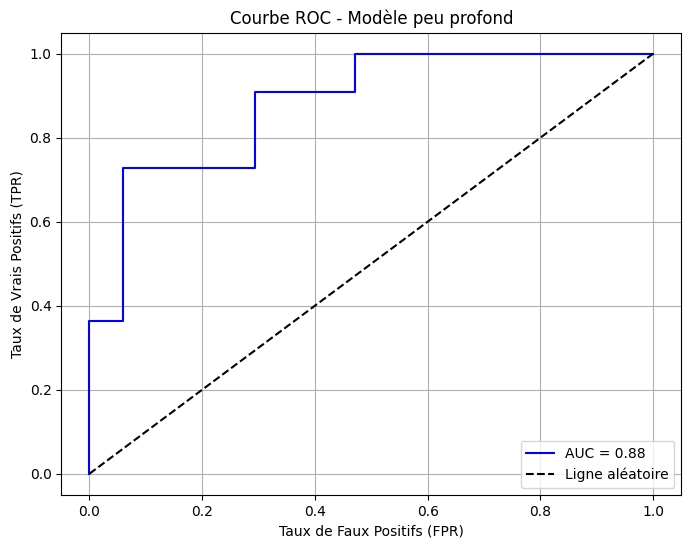

In [67]:
plot_roc_curve(shallow_roc_data, "Modèle peu profond")

#### Modèle profond

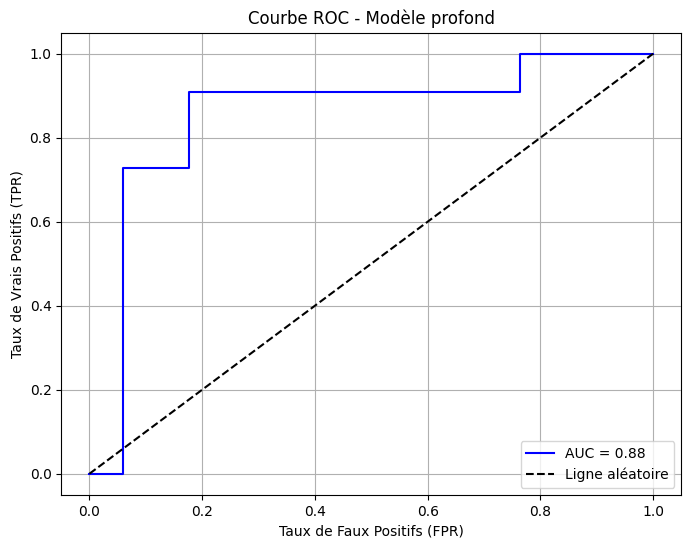

In [68]:
plot_roc_curve(deep_roc_data, "Modèle profond")

### **Analyse des courbes ROC**

Les courbes ROC montrent la performance des modèles en termes de compromis entre le taux de vrais positifs (TPR) et le taux de faux positifs (FPR).

•	Modèle peu profond :

L’AUC de 0.79 reflète une bonne capacité de discrimination entre les classes positives et négatives.

La courbe ROC se situe bien au-dessus de la ligne aléatoire (AUC = 0.5), indiquant que le modèle apprend efficacement à différencier les composés qui passent ou non la membrane placentaire.

•	Modèle profond :

L’AUC de 0.84 est légèrement meilleure, ce qui confirme une discrimination des classes légèrement plus précise par rapport au modèle peu profond.

Cependant, l’écart entre l’AUC et le rappel (55 %) suggère que le modèle profond, bien qu’il discrimine mieux globalement, a des difficultés à capturer tous les cas positifs.



### Conclusion

Le modèle profond atteint une meilleure performance globale avec une AUC de 0.84, montrant une discrimination plus précise entre les classes.

•	Le modèle peu profond, avec un rappel plus élevé (73 %), est plus efficace pour identifier les composés positifs, mais avec une précision légèrement inférieure.

•	Le choix du modèle dépend des priorités : le modèle peu profond pour minimiser les faux négatifs, ou le modèle profond pour une meilleure classification globale.

•	Des optimisations supplémentaires pourraient encore améliorer les deux modèles.

# Conclusion 

Au cours de ce TP, nous avons exploré deux architectures de réseaux de neurones, un modèle peu profond et un modèle profond, pour prédire la variable binaire Cl2. Le modèle peu profond s'est avéré plus adapté, grâce à une précision de validation stable autour de 75 %, tandis que le modèle profond a montré des signes de surapprentissage en raison de la taille limitée des données. Les performances ont été évaluées à l'aide de métriques telles que l'accuracy, le recall et le ROC-AUC, en utilisant les bibliothèques TensorFlow/Keras, Scikit-learn et Matplotlib. Ce TP a mis en évidence l'importance d'adapter le choix du modèle à la taille et à la nature des données pour garantir une meilleure généralisation.

**Compétences** : <br>
À l'issue de ce TP, vous devez être capable de concevoir, entraîner et évaluer des modèles de réseau de neurones adaptés à différents jeux de données. Vous avez appris à analyser les courbes de perte et de précision pour identifier des problèmes comme le surapprentissage ou le sous-apprentissage, et à choisir la complexité du modèle en fonction de la taille des données. Vous êtes également en mesure de comparer les performances de modèles simples et complexes et de justifier votre choix en fonction des résultats obtenus.